[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Examples 9.2, 9.7 and 9.14, and Figure 9.14 

Analysis of the sample proportion as an estimator of the prevalence of COVID-19 in a fictitious scenario where the true population proportion of COVID-19 infections is 5%\
Topics: Sample proportion, law of large numbers, bias, standard error, consistency, convergence in probability, central limit theorem, convergence in distribution

Author: Carlos Fernandez-Granda

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from numpy.random import default_rng
rng = default_rng(2022)
import matplotlib
matplotlib.rcParams['text.usetex'] = True
rng = default_rng(2021)


font_size = 15
font_size_legend = 15
font_size_ticks = 15

population_proportion = 0.05
sigma = np.sqrt(population_proportion*(1-population_proportion))

Text(0.5, 0, 'Distribution of sample proportion')

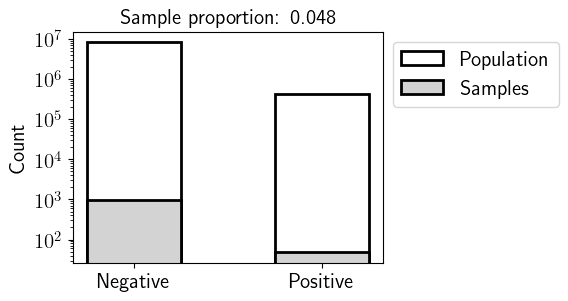

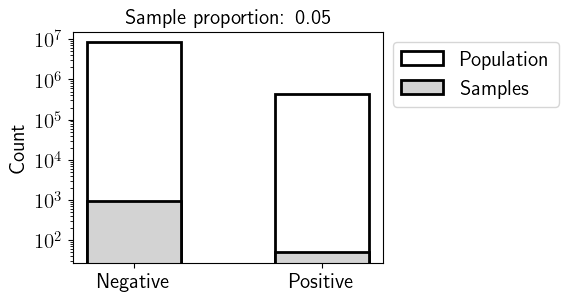

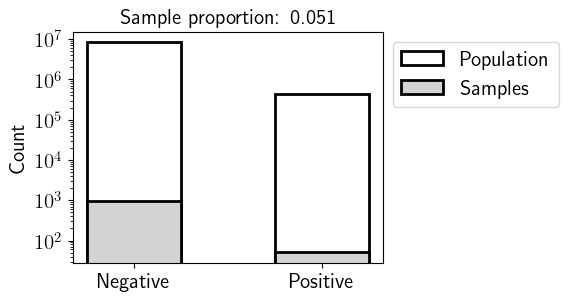

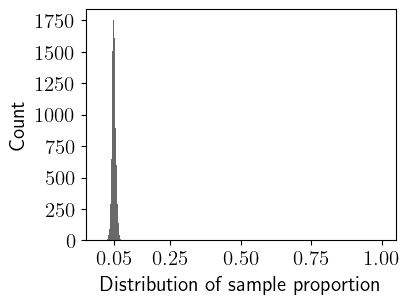

In [23]:
n = int(1e3)
n_pop = 8.8 * 1e6
pos_pop = n_pop * population_proportion
neg_pop = n_pop - pos_pop
vals = [0,1]
xmin = -0.6
xmax = 1.6
tries = 3

for ind in range(tries):
    pos_samples = rng.binomial(n,population_proportion)
    neg_samples = n-pos_samples
    fig, ax = plt.subplots(figsize=(4,3))
    ax.set_yscale('log')
    plt.bar(vals,[neg_pop,pos_pop], width = 0.5, color = "white", edgecolor="black",linewidth = 2,label="Population")
    plt.bar(vals,[neg_samples,pos_samples], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2,
            label="Samples")
    plt.xticks(vals,["Negative","Positive"],fontsize=font_size_ticks)
    plt.yticks(fontsize=font_size_ticks)
    plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.ylabel("Count",fontsize=font_size,labelpad = 5)
    plt.title("Sample proportion: "+str(round(pos_samples/n,3)),fontsize=font_size)
    
n_bins = 20
more_tries = int(1e4)
sample_means = (rng.binomial(n,population_proportion,more_tries)).astype('float')/n  
plt.figure(figsize=(4,3))
plt.xticks([0.05,0.25,0.5,0.75,1],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(sample_means,bins=n_bins,color='dimgray',
              linewidth=2,density=False)
plt.xlim([-0.05,1.05])
plt.ylabel(r"Count",fontsize=font_size,labelpad = 5)
plt.xlabel(r"Distribution of sample proportion",fontsize=font_size,labelpad = 5)

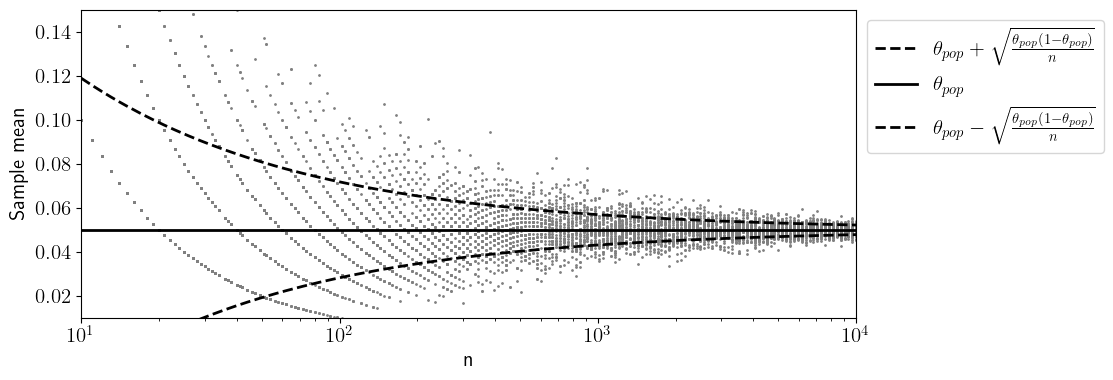

In [24]:
# By the law of large numbers, the sample proportion is a consistent estimator of the population proportion 
# (i.e. the sample proportion converges in probability to the population proportion)
tries = 40#int(1e2)
m = 200
n_vals = np.logspace(1,4,m,dtype=int)
n_max = 10**4

ymin = 0.01
ymax = 0.15

plt.figure(figsize=(10,4))
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size)
plt.xlim([10,n_max])
plt.ylim(ymin,ymax)
for ind_n,n in enumerate(n_vals):
    sample_means = (rng.binomial(n,population_proportion,tries)).astype('float')/n
    plt.plot(n * np.ones(tries),sample_means,'.',ms=2,color="gray",rasterized=True)
plt.semilogx(n_vals,population_proportion + sigma/np.sqrt(n_vals),lw=2,ls='dashed',color='black',
         label=r"$\theta_{pop}+\sqrt{\frac{ \theta_{pop} (1-\theta_{pop})}{n}}$")
plt.semilogx(n_vals,np.ones(len(n_vals))*population_proportion,lw=2,color='black',
         label=r"$\theta_{pop}$")
plt.semilogx(n_vals,population_proportion - sigma/np.sqrt(n_vals),lw=2,ls='dashed',color='black',
         label=r"$\theta_{pop}-\sqrt{\frac{ \theta_{pop} (1-\theta_{pop})}{n}}$")
plt.xlabel("n",fontsize=font_size)
plt.ylabel('Sample mean',fontsize=font_size,labelpad = 5)
plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

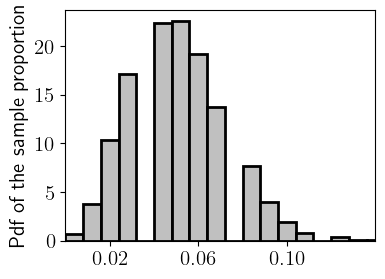

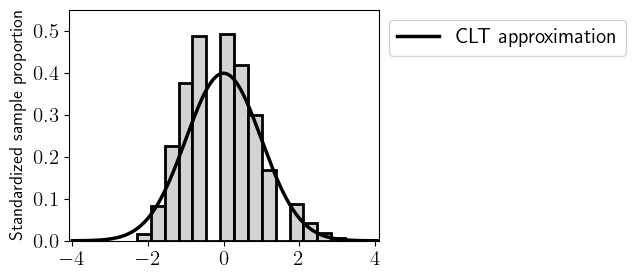

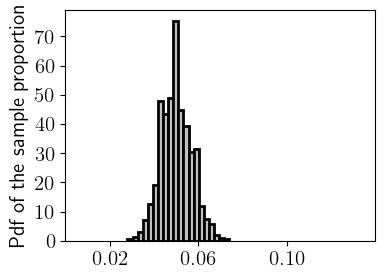

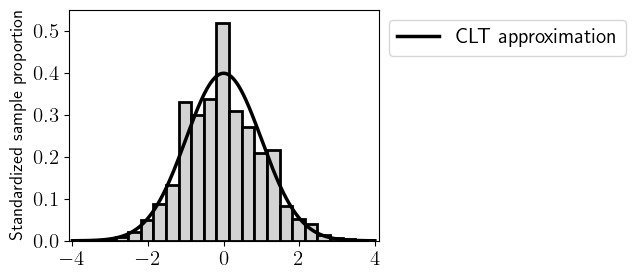

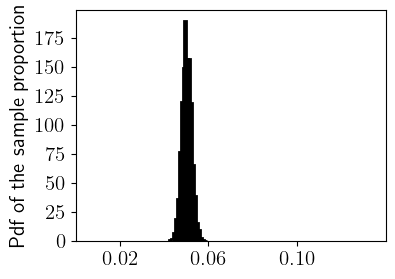

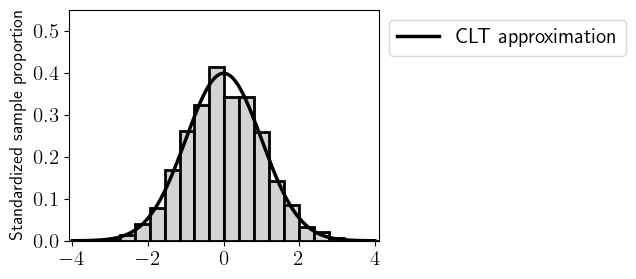

In [25]:
# By the central limit theorem (CLT), the distribution of the sample proportion converges in distribution to a Gaussian
tries = int(1e4)
n_vals = [100,1000,10000]
n_bins = 20
x = np.arange(-4,4+1e-2,1e-2)
x_min = 0
x_max = 0.14
y_max = 190
x_min_norm = -4.1
x_max_norm = 4.1
y_max_norm = 0.55

for ind_n,n in enumerate(n_vals):
    sample_means = (rng.binomial(n,population_proportion,tries)).astype('float')/n  
    plt.figure(figsize=(4,3))
    plt.xticks([0.02,0.06,0.1],fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(sample_means,bins=n_bins,color='silver', edgecolor='black',
              linewidth=2,density=True)
    plt.xlim([x_min,x_max])
    plt.ylabel(r"Pdf of the sample proportion",fontsize=font_size,labelpad = 5)
    
    plt.figure(figsize=(4,3))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist((sample_means-population_proportion)/(sigma / np.sqrt(n)),bins=n_bins,color='lightgray', edgecolor='black',
              linewidth=2,density=True)
    plt.plot(x,norm.pdf(x,0,1),lw=2.5,color="black",label='CLT approximation')
    plt.ylabel(r"Probability density function",fontsize=font_size,labelpad = 5)
    plt.ylabel(r"Standardized sample proportion",fontsize=font_size-2,labelpad = 5)
    plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.ylim([0,y_max_norm])
    plt.xlim([x_min_norm,x_max_norm])